In [19]:
#importing all the libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical

In [2]:
#giving path of the current directory
cur_path = os.getcwd()
cur_path

'C:\\Users\\acer\\Desktop\\Data Science\\ML project\\New folder'

In [8]:
#store data , labels in the list
data = []
labels = []
classes = 43

In [11]:
#loading data from the directory and converting img to an array
for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        try: 
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print (e)

In [12]:
#converting lists into numpy array
data = np.array(data)
labels = np.array(labels)

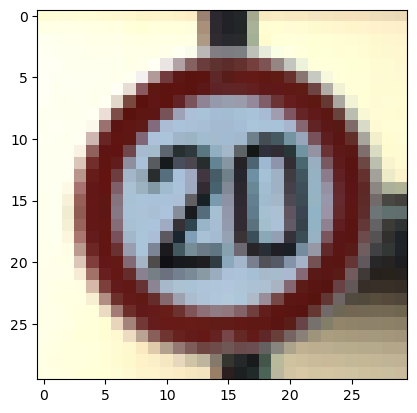

In [13]:
#sample image
img = Image.open('Train/0/00000_00004_00029.png')
img = img.resize((30,30))
sr = np.array(img)
plt.imshow(img)
plt.show()

In [14]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels, test_size = 0.25,random_state = 42)
print('training shape: ', X_train.shape, y_train.shape)
print('testing shape: ', X_test,y_test)
y_train = to_categorical(y_train, 43)
y_test  =to_categorical(y_test, 43)

training shape:  (29406, 30, 30, 3) (29406,)
testing shape:  [[[[106  59  42]
   [ 94  54  38]
   [ 74  50  33]
   ...
   [138  82  41]
   [131  82  47]
   [170 109  65]]

  [[105  66  47]
   [ 89  58  40]
   [ 88  50  29]
   ...
   [ 97  60  25]
   [ 58  48  18]
   [ 75  63  27]]

  [[117  73  48]
   [ 96  63  36]
   [102  57  27]
   ...
   [ 95  63  32]
   [ 73  54  22]
   [ 75  55  22]]

  ...

  [[ 95  52  31]
   [ 90  56  37]
   [ 82  48  30]
   ...
   [ 95  68  33]
   [ 96  64  37]
   [ 98  70  38]]

  [[ 96  59  41]
   [ 98  57  42]
   [104  62  50]
   ...
   [102  74  41]
   [115  81  57]
   [104  71  44]]

  [[115  77  52]
   [122  74  49]
   [123  80  56]
   ...
   [112  83  46]
   [ 90  66  35]
   [ 82  58  31]]]


 [[[188 217 221]
   [252 255 255]
   [255 255 255]
   ...
   [ 21  21  23]
   [ 20  19  21]
   [ 20  19  22]]

  [[193 211 214]
   [255 255 255]
   [255 255 255]
   ...
   [ 20  18  20]
   [ 19  18  20]
   [ 19  18  23]]

  [[194 207 211]
   [255 255 255]
   [255 

In [20]:
#importing the required layers and modules to create our convolution neural network architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [22]:
#building a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))


In [23]:
# compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train, epochs = 15, batch_size = 64, validation_data=(X_test,y_test))

Epoch 1/15
460/460 [==============================] - 105s 217ms/step - loss: 2.4903 - accuracy: 0.3877 - val_loss: 1.0260 - val_accuracy: 0.7374
Epoch 2/15
460/460 [==============================] - 90s 196ms/step - loss: 1.0830 - accuracy: 0.6821 - val_loss: 0.4548 - val_accuracy: 0.8895
Epoch 3/15
460/460 [==============================] - 67s 146ms/step - loss: 0.7801 - accuracy: 0.7645 - val_loss: 0.3076 - val_accuracy: 0.9108
Epoch 4/15
460/460 [==============================] - 65s 142ms/step - loss: 0.5895 - accuracy: 0.8203 - val_loss: 0.1929 - val_accuracy: 0.9483
Epoch 5/15
460/460 [==============================] - 68s 148ms/step - loss: 0.4672 - accuracy: 0.8567 - val_loss: 0.1406 - val_accuracy: 0.9570
Epoch 6/15
460/460 [==============================] - 68s 149ms/step - loss: 0.3704 - accuracy: 0.8876 - val_loss: 0.1362 - val_accuracy: 0.9590
Epoch 7/15
460/460 [==============================] - 68s 147ms/step - loss: 0.3136 - accuracy: 0.9053 - val_loss: 0.0959 - val_a

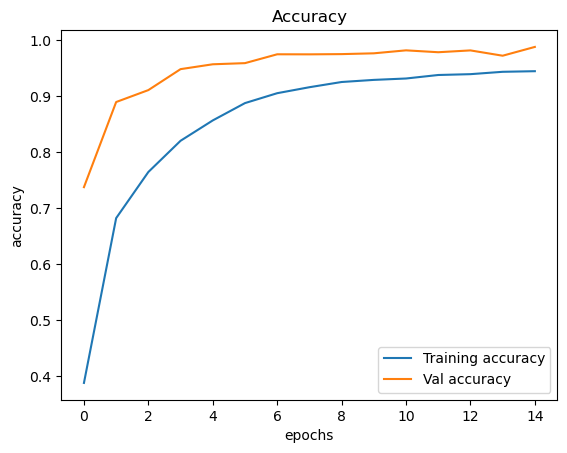

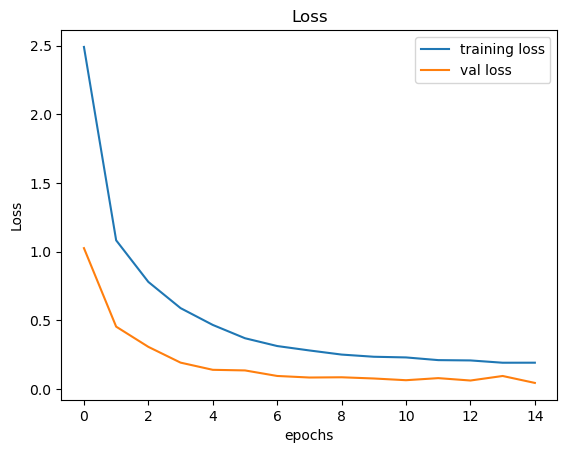

In [26]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
#testing model
def testing(s):
    y_test = pd.read_csv(s)
    label = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label

In [28]:
X_test, label = testing('Test.csv')

In [31]:
y_pred1 = model.predict(X_test)
y_pred2 = np.argmax(y_pred1, axis = 1)


395/395 [==============================] - 5s 11ms/step


In [32]:
y_pred2

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [33]:
#accuracy with test data
from sklearn.metrics import accuracy_score
accuracy_score(label, y_pred2)

0.9536025336500396

In [34]:
#saving model
model.save('traffic_classifier.h5')

## ***Loading and testing model***

In [35]:
import os
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [49]:
#classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons'
          }

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    y_pred1 = model.predict(X_test)
    y_pred2 = np.argmax(y_pred1, axis = 1)
    return image,y_pred2

1/1 [==============================] - 0s 23ms/step
Predicted traffic sign is:  Turn left ahead


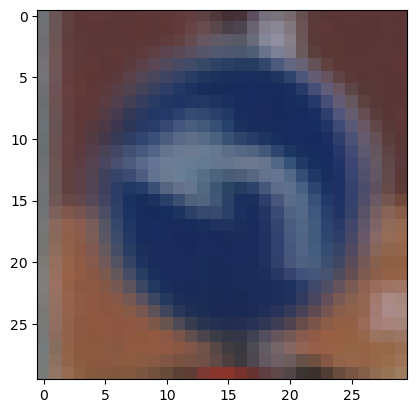

In [56]:
plot,prediction = test_on_img('Train/34/00034_00001_00029.png')
s = [str(i) for i in prediction]
a = int(''.join(s))
print('Predicted traffic sign is: ', classes[a])
plt.imshow(plot)
plt.show()